**STROKE PREDICTION USING SUPERVISED LEARNING**:


**Problem Setting:**

A stroke is a serious medical condition that occurs when the blood supply to the brain is disrupted.
This can lead to a variety of symptoms, including weakness or numbness on one side of the body,
problems with vision, speech, or coordination, and even death. Therefore, we need an algorithm
that can predict the occurrence of a stroke in an individual, so that timely measures can be taken
to avoid it.

**Problem Definition:**

Given a dataset of patients with a set of input features (medical history, lifestyle factors,
demographic information,), the goal of using supervised learning for stroke prediction is to develop
a model that can accurately predict which individuals are at risk of having a stroke. The model
should be trained on a labeled dataset of patients, where the input features and outcome (i.e.,
whether the patient had a stroke) are known. Supervised learning algorithms such as logistic
regression, k-nearest neighbors, decision trees, Random Forest, and Neural Networks are
commonly used for stroke prediction. The model should be able to make predictions on new,
unseen patients and should be evaluated using performance metrics such as accuracy, precision,
recall, and F1-score. 

**Data Sources:**

The data for this project Stroke Prediction using Supervised Learning has been taken from Kaggle
open-source website.

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset


**Data Description:**

The dataset contains 5110 records and 12 attributes. Following are the attributes:

*   id: unique identifier
*   gender: "Male", "Female" or "Other"
*   age: age of the patient
*   hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
*   heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart
disease
*   ever_married: "No" or "Yes"
*   work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
*   Residence_type: "Rural" or "Urban"
*   avg_glucose_level: average glucose level in blood
*   bmi: body mass index
*   smoking_status: "formerly smoked", "never smoked", "smokes"
*   stroke: 1 if the patient had a stroke or 0 if not

## Data Collection and Processing

In [1]:
from google.colab import files
df_file = files.upload()

Saving Stroke_Prediction.csv to Stroke_Prediction (1).csv


In [2]:
# Importing all the libraries
import numpy as np
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Storing values of CSV file into a dataframe
df = pd.read_csv('Stroke_Prediction.csv')

In [5]:
# Displaying first five records
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
# Displaying last five records
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [7]:
# Checking the shape of the dataframe
print(df.shape)

(5110, 12)


In [8]:
# Checking the columns of the dataframe
print(df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [9]:
# Checking information of all the columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [10]:
# Describe the dataframe
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
# Checking for null values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [12]:
# Finding mean of bmi attribute
mean_bmi = np.mean(df['bmi'])
print(mean_bmi)

28.893236911794666


In [13]:
# Perform data imputation - Replacing null values in bmi attribute with mean value
df['bmi'].fillna(value = mean_bmi, inplace = True)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [14]:
# Checking for null values
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [15]:
# Attribute id is irrelevant to our project. Hence, dropping it
df = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']]
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [16]:
# Converting integer valued attribute to integer data type from float data type
df['age'] = df['age'].astype(int)
df['hypertension'] = df['hypertension'].astype(int)
df['heart_disease'] = df['heart_disease'].astype(int)
df['stroke'] = df['stroke'].astype(int)

In [17]:
# Rounding off bmi attribute to 2 decimal points
df['bmi'] = df['bmi'].round(2)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.89,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


In [18]:
# Checking shape of the dataframe after performing imputation
df.shape

(5110, 11)

In [19]:
# Checking information of all the columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 439.3+ KB
None


In [20]:
# Describe the dataframe
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.215264,0.097456,0.054012,106.147677,28.893110,0.048728
std,22.633866,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [21]:
# Displaying first five records
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.89,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


In [22]:
# Displaying last five records
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,Female,80,1,0,Yes,Private,Urban,83.75,28.89,never smoked,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0
5109,Female,44,0,0,Yes,Govt_job,Urban,85.28,26.20,Unknown,0


In [23]:
# Need to perform label encoding for all categorical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
# Performing label encoding for attributes 'gender', 'ever_married', 'work_type', 'Residence_type' and 'smoking_status'
df['gender']= le.fit_transform(df['gender'])
df['ever_married']= le.fit_transform(df['ever_married'])
df['work_type']= le.fit_transform(df['work_type'])
df['Residence_type']= le.fit_transform(df['Residence_type'])
df['smoking_status']= le.fit_transform(df['smoking_status'])

In [25]:
# Checking null values after performing Label Encoding
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [26]:
# Checking information of all the columns after performing Label Encoding
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 439.3 KB
None


In [27]:
# Describe the dataframe after performing Label Encoding
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.215264,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893110,1.376908,0.048728
std,0.493044,22.633866,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [28]:
# Displaying first five records after performing Label Encoding
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228.69,36.60,1,1
1,0,61,0,0,1,3,0,202.21,28.89,2,1
2,1,80,0,1,1,2,0,105.92,32.50,2,1
3,0,49,0,0,1,2,1,171.23,34.40,3,1
4,0,79,1,0,1,3,0,174.12,24.00,2,1


In [29]:
# Displaying last five records after performing Label Encoding
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,0,80,1,0,1,2,1,83.75,28.89,2,0
5106,0,81,0,0,1,3,1,125.20,40.00,2,0
5107,0,35,0,0,1,3,0,82.99,30.60,2,0
5108,1,51,0,0,1,2,0,166.29,25.60,1,0
5109,0,44,0,0,1,0,1,85.28,26.20,0,0


In [30]:
# Checking correlation among all the attributes
corr_matrix = df.corr()
corr_matrix

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.028304,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.055180,-0.026113,-0.062581,0.008929
age,-0.028304,1.000000,0.276303,0.263668,0.679181,-0.362146,0.014169,0.238060,0.326264,0.265595,0.245128
hypertension,0.020994,0.276303,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.160181,0.111038,0.127904
heart_disease,0.085447,0.263668,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.038891,0.048460,0.134914
ever_married,-0.031005,0.679181,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.335702,0.259647,0.108340
work_type,0.056422,-0.362146,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.299448,-0.305927,-0.032316
Residence_type,-0.006738,0.014169,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,-0.000121,0.008237,0.015458
avg_glucose_level,0.055180,0.238060,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.168744,0.063437,0.131945
bmi,-0.026113,0.326264,0.160181,0.038891,0.335702,-0.299448,-0.000121,0.168744,1.000000,0.219148,0.038935
smoking_status,-0.062581,0.265595,0.111038,0.048460,0.259647,-0.305927,0.008237,0.063437,0.219148,1.000000,0.028123


# Data Exploration and Visualization

In [31]:
# Importing all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px

In [32]:
from google.colab import files
df_file = files.upload()

Saving Stroke_Prediction_Processed_Data.csv to Stroke_Prediction_Processed_Data.csv


In [33]:
# Storing values of CSV file into a dataframe
df = pd.read_csv('Stroke_Prediction_Processed_Data.csv')

In [34]:
# drop column 'Unnamed: 0'
df = df.drop('Unnamed: 0', axis=1)

In [35]:
# Displaying first five records
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228.69,36.60,1,1
1,0,61,0,0,1,3,0,202.21,28.89,2,1
2,1,80,0,1,1,2,0,105.92,32.50,2,1
3,0,49,0,0,1,2,1,171.23,34.40,3,1
4,0,79,1,0,1,3,0,174.12,24.00,2,1


In [36]:
# Displaying last five records
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,0,80,1,0,1,2,1,83.75,28.89,2,0
5106,0,81,0,0,1,3,1,125.20,40.00,2,0
5107,0,35,0,0,1,3,0,82.99,30.60,2,0
5108,1,51,0,0,1,2,0,166.29,25.60,1,0
5109,0,44,0,0,1,0,1,85.28,26.20,0,0


In [37]:
# Checking the shape of the dataframe
print(df.shape)

(5110, 11)


In [38]:
# Describe the dataframe
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.215264,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893110,1.376908,0.048728
std,0.493044,22.633866,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [39]:
# Checking for null values
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

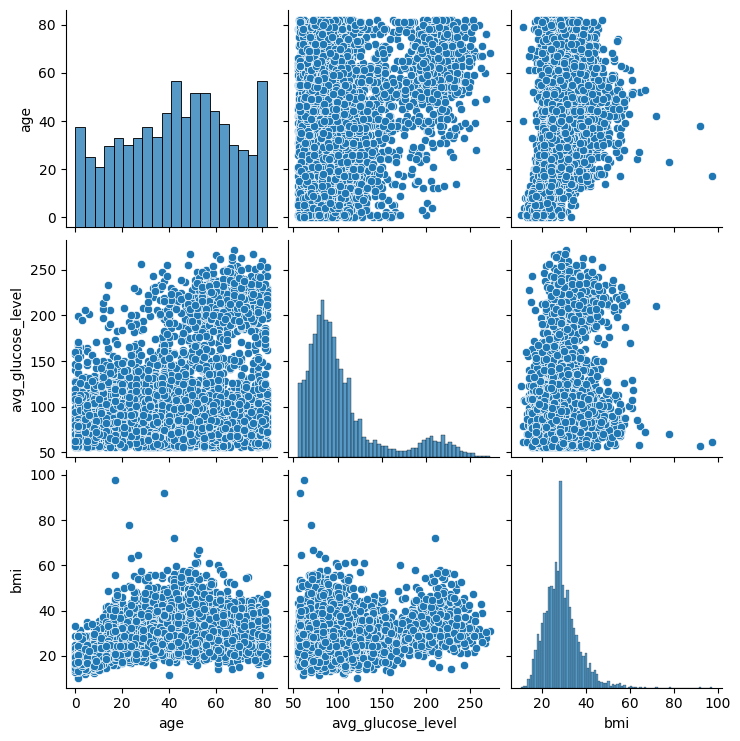

In [40]:
# Exploratory Data Analysis of Numerical Attributes
sns.pairplot(df[['age','avg_glucose_level','bmi']])

**INTERPRETATIONS:**

The above code creates a pairwise scatter plot using the Seaborn library, which can be used to visualize the relationships between numerical variables in the dataset. Specifically, this plot appears to show the pairwise relationships between the 'age', 'avg_glucose_level', and 'bmi' variables.

By examining the scatter plots, we are able to identify any patterns or correlations between these variables. For example, we are able to observe whether there is a linear or non-linear relationship between age and average glucose level, or whether there is a positive or negative correlation between BMI and average glucose level. Additionally, we are able to identify any outliers or unusual patterns in the data.

Overall, this exploratory data analysis provides a useful starting point for further analysis and hypothesis testing, it can help us to better understand the relationships between variables and to identify any potential trends or anomalies in the data.

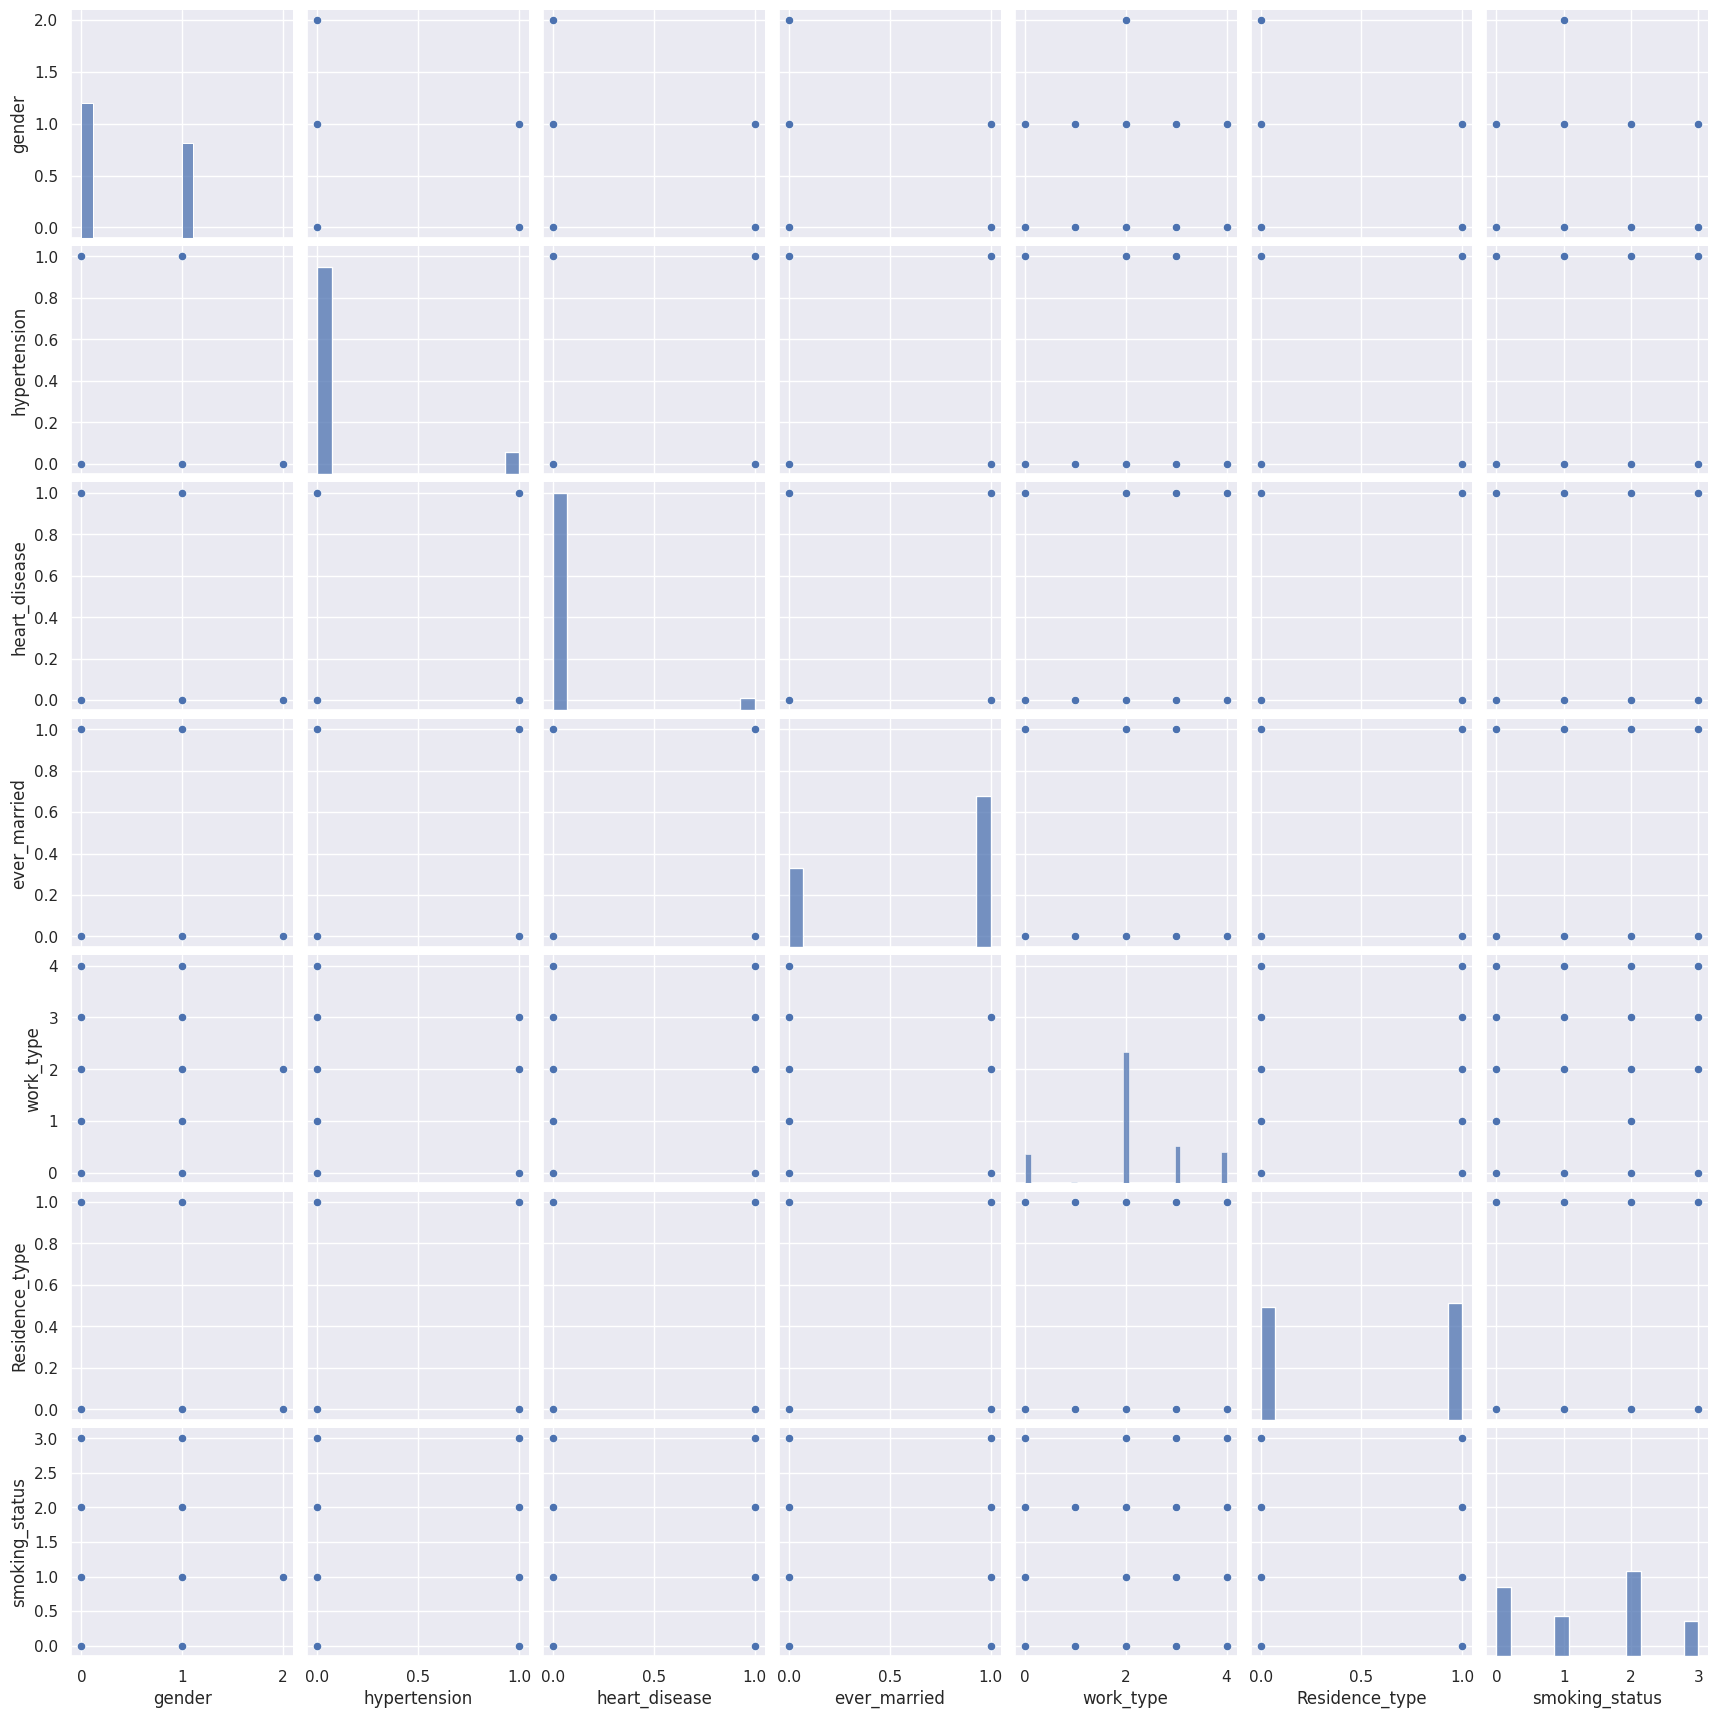

In [41]:
# Exploratory Data Analysis of Categorical Attributes
sns.set(rc={'figure.figsize':(8,6)})
sns.pairplot(df[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']])

**INTERPRETATIONS:**

The code creates a pairwise scatter plot using the Seaborn library, which is used to visualize the relationships between categorical variables in the dataset. Specifically, this plot appears to show the pairwise relationships between the 'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', and 'smoking_status' variables.

By examining the scatter plots, we are able to identify any patterns or correlations between these categorical variables. For example, we are able to observe whether there are any differences in hypertension rates between different genders, or whether there is a relationship between smoking status and heart disease. Additionally, we are able to identify any imbalances or unusual patterns in the data.

Overall, this exploratory data analysis provides a useful starting point for further analysis and hypothesis testing, as it can help us to better understand the relationships between categorical variables and to identify any potential trends or anomalies in the data.

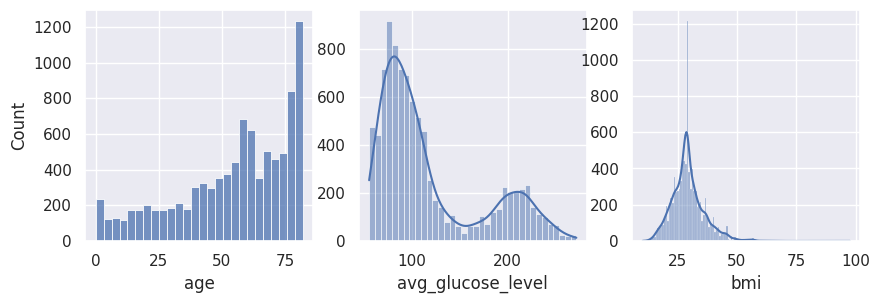

In [173]:
# Histogram
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
sns.histplot(df["age"])
plt.subplot(1,3,2)
g1=sns.histplot(df["avg_glucose_level"],kde=True)
g1.set(ylabel=None)
plt.subplot(1,3,3)
g1=sns.histplot(df["bmi"],kde=True)
g1.set(ylabel=None)
plt.show()

**INTERPRETATIONS:**

The age data appears to follow a fairly normal distribution with most values falling within the range of 20 to 60 years old. This is a reasonable age range for a general population dataset.

Regarding glucose levels, the majority of the data seems to be within the normal range. However, there are a few high values that stand out. It may be worthwhile to investigate these high values further to determine if there are any underlying medical conditions that could be contributing to them.

Similarly to glucose levels, the BMI data also appears to be distributed normally with no major outliers. However, it's important to note that a high BMI can be an indicator of obesity-related health risks, so it is important to consider this factor in any analyses or interpretations of the data. Overall, the distribution of the BMI data seems similar to that of the glucose levels.

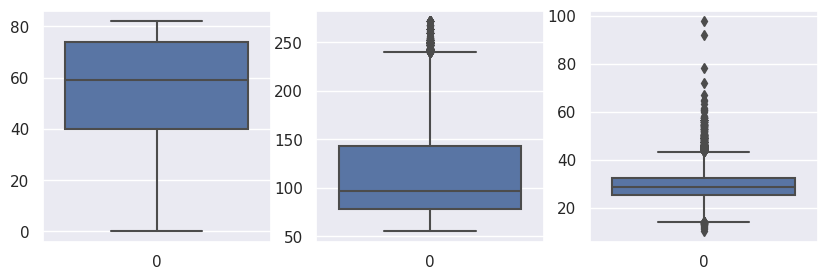

In [174]:
# Box Plot
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
sns.boxplot(df["age"]);
plt.subplot(1,3,2)
sns.boxplot(df["avg_glucose_level"]);
plt.subplot(1,3,3)
sns.boxplot(df["bmi"]);

**INTERPRETATIONS:**

When examining the data on average glucose levels, the majority of the values appear to be within the normal range. However, there are certain values that stand out as being significantly higher than the rest. These outliers could indicate that some individuals within the dataset are experiencing high blood sugar levels.

As for BMI, it is worth noting that some values are quite high, such as those exceeding 40. A BMI greater than 40 is generally considered to indicate a high risk of obesity-related health problems. It is important to pay attention to these high BMI values in order to identify individuals who may require additional medical attention or support to manage their weight and reduce their risk of obesity-related conditions.

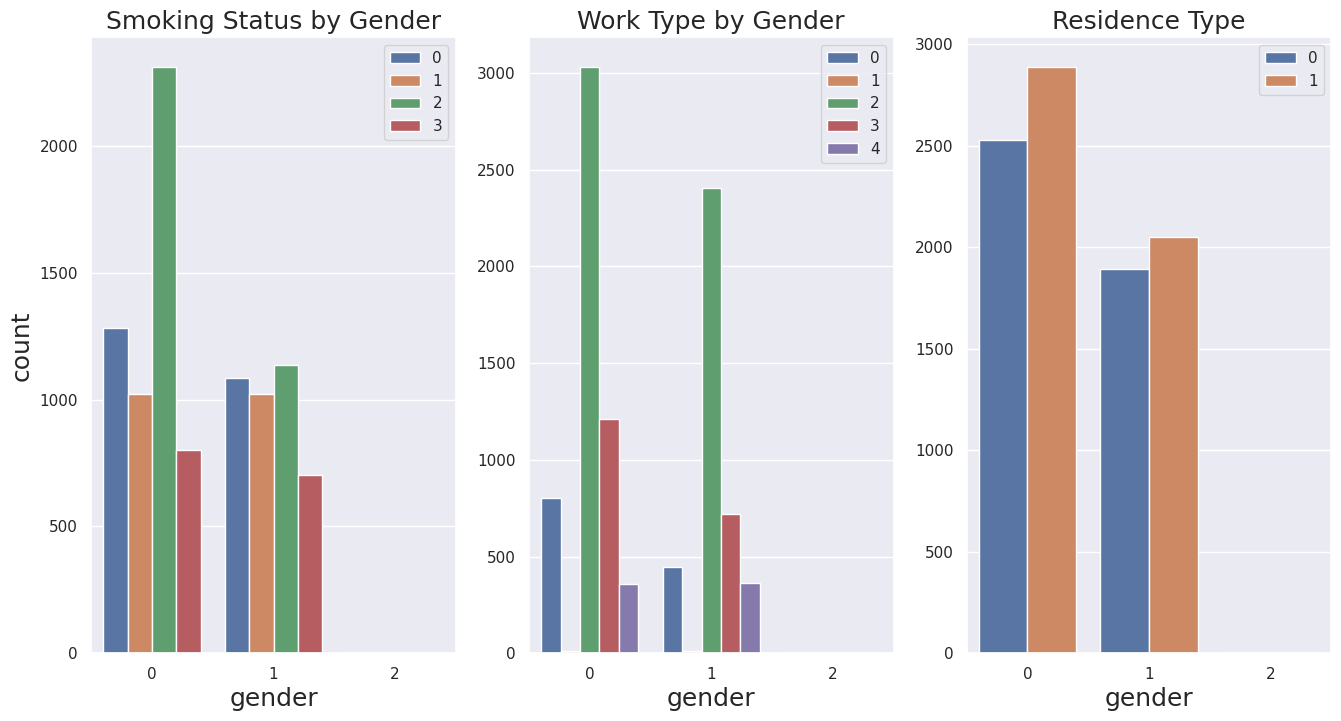

In [176]:
# Count Plot
plt.figure(figsize=(16,8))

plt.subplot(1,3,1)
plt.title("Smoking Status by Gender",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.xlabel("Gender",fontsize=18)
sns.countplot(x=df["gender"],hue="smoking_status",data=df);
plt.legend(loc=1, prop={'size': 11})

plt.subplot(1,3,2)
plt.title("Work Type by Gender",fontsize=18)
plt.xlabel("Gender",fontsize=18)
g1=sns.countplot(x=df["gender"],hue="work_type",data=df);
g1.set(ylabel=None)
plt.legend(loc=1, prop={'size': 11})

plt.subplot(1,3,3)
plt.title("Residence Type",fontsize=18)
plt.xlabel("Gender",fontsize=18)
g1=sns.countplot(x=df["gender"],hue="Residence_type",data=df);
plt.legend(loc=1, prop={'size': 11})
g1.set(ylabel=None)

plt.show()

**INTERPRETATIONS:**

It appears that a significant proportion of female individuals in the dataset have never smoked, which is a positive indicator for their long-term health. Additionally, there seems to be some missing information regarding smoking status for a substantial portion of the population, which may be worth noting in any analyses that rely on this variable.

For both genders, a large number of individuals seem to be employed in the private sector, which could have implications for job stability, benefits, and other factors related to employment.

Interestingly, there appears to be an equal number of men and women residing in both urban and rural areas, as indicated by the Residence Type column. This could be an important consideration for researchers examining factors related to urbanization, rural development, and population distribution. It is worth noting, however, that this dataset may not be representative of the population as a whole, and caution should be taken when making generalizations based on these findings.

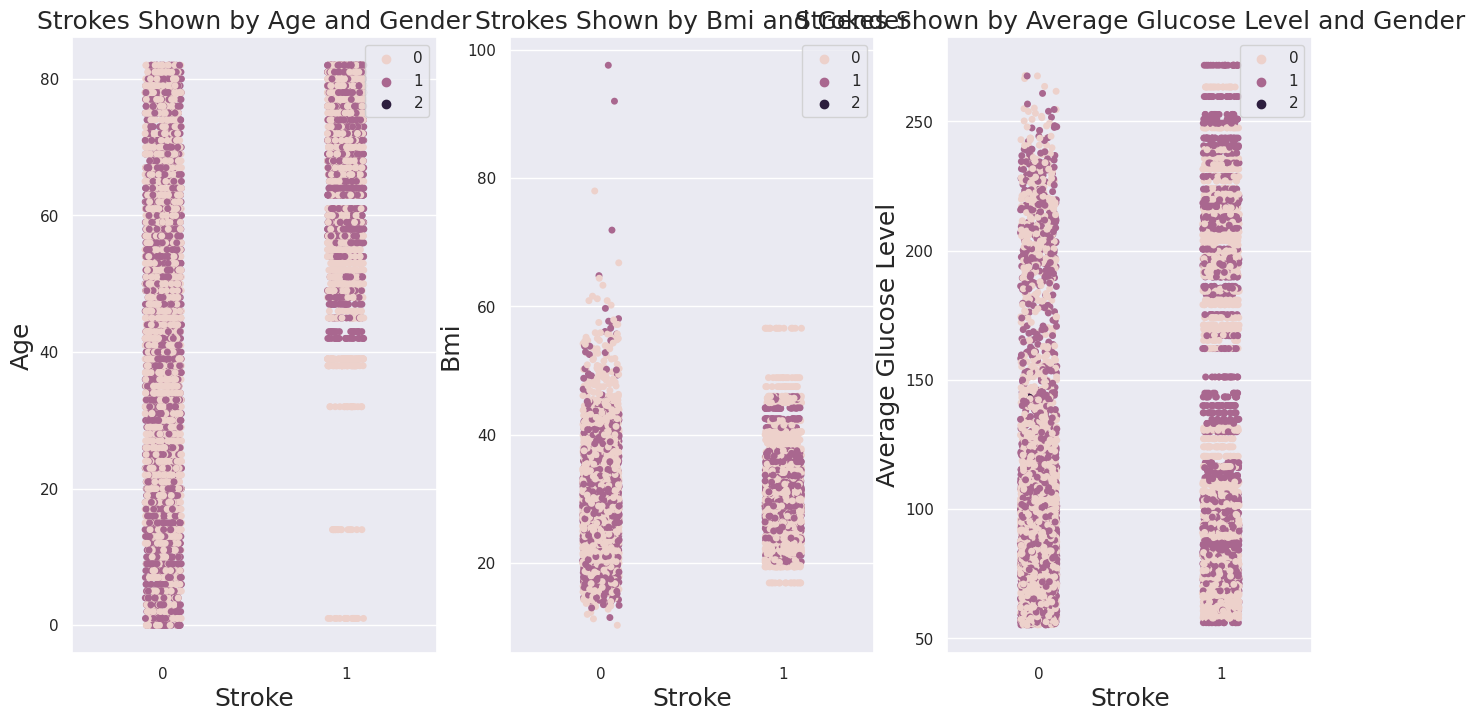

In [177]:
# Strip Plot
plt.figure(figsize=(16,8))

plt.subplot(1,3,1)
plt.title("Strokes Shown by Age and Gender",fontsize=18)
sns.stripplot(x="stroke",y="age",hue="gender",data=df)
plt.xlabel("Stroke",fontsize=18)
plt.ylabel("Age",fontsize=18)
plt.legend(loc=1, prop={'size': 11})

plt.subplot(1,3,2)
plt.title("Strokes Shown by Bmi and Gender",fontsize=18)
sns.stripplot(x="stroke",y="bmi",hue="gender",data=df)
plt.xlabel("Stroke",fontsize=18)
plt.ylabel("Bmi",fontsize=18)
plt.legend(loc=1, prop={'size': 11})

plt.subplot(1,3,3)
plt.title("Strokes Shown by Average Glucose Level and Gender",fontsize=18)
sns.stripplot(x="stroke",y="avg_glucose_level",hue="gender",data=df)
plt.xlabel("Stroke",fontsize=18)
plt.ylabel("Average Glucose Level",fontsize=18)
plt.legend(loc=1, prop={'size':11})

plt.show()

**INTERPRETATIONS:**

The dataset appears to have a higher number of female individuals than male individuals, which may be worth considering in any analyses or interpretations of the data.

When looking at the age distribution of individuals who experienced strokes, it appears that the majority fall within the range of 40 to 80 years old. Younger individuals appear to have a lower incidence of stroke, though there are still a few cases present in the dataset.

Interestingly, it seems that lower BMI levels may be associated with a higher rate of stroke, as there appear to be more cases of stroke in individuals with lower BMI levels compared to higher ones. However, it's important to note that the relationship between BMI and stroke risk is complex and multifactorial, and further research is needed to better understand this relationship.

Regarding glucose levels, it appears that both low and high levels can be associated with strokes, but there may be a slightly higher incidence of stroke in individuals with lower glucose levels. It's important to consider that these findings may be influenced by other factors such as age, gender, and comorbidities, and further analysis is needed to fully understand the relationship between glucose levels and stroke risk.

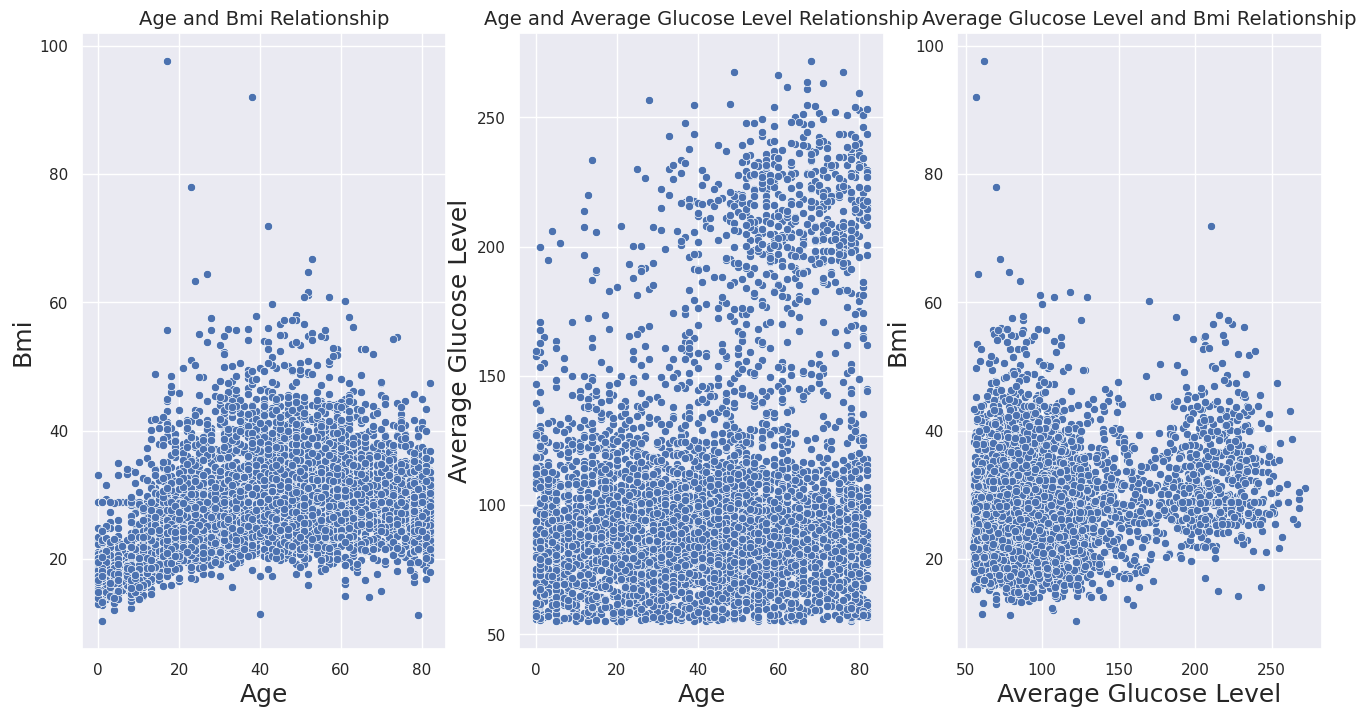

In [178]:
# Scatter Plot
plt.figure(figsize=(16,8))

plt.subplot(1,3,1)
plt.title("Age and Bmi Relationship",fontsize=14)
plt.xlabel("Age",fontsize=18)
plt.ylabel("Bmi",fontsize=18)
sns.scatterplot(x="age",y="bmi",data=df)

plt.subplot(1,3,2)
plt.title("Age and Average Glucose Level Relationship",fontsize=14)
plt.xlabel("Age",fontsize=18)
plt.ylabel("Average Glucose Level",fontsize=18)
sns.scatterplot(x="age",y="avg_glucose_level",data=df)

plt.subplot(1,3,3)
plt.title("Average Glucose Level and Bmi Relationship",fontsize=14)
plt.xlabel("Average Glucose Level",fontsize=18)
plt.ylabel("Bmi",fontsize=18)
sns.scatterplot(x="avg_glucose_level",y="bmi",data=df)

plt.show()

**INTERPRETATIONS:**

Based on the first graph, it appears that individuals within the age range of 20 to 60 years old have higher BMI values compared to other age groups in the dataset. This may suggest that age is an important factor to consider when assessing BMI levels.

The second graph shows that individuals over the age of 40 have higher glucose levels on average, which could be indicative of diabetes or pre-diabetes. It is important to note, however, that further medical evaluation is needed to confirm any diagnoses.

Lastly, the third graph seems to suggest that there may be a relationship between low glucose levels and low BMI values. This could be an important finding for individuals looking to manage their weight and blood glucose levels through diet and exercise. However, it is important to consider other factors such as age, gender, and lifestyle when interpreting these results.

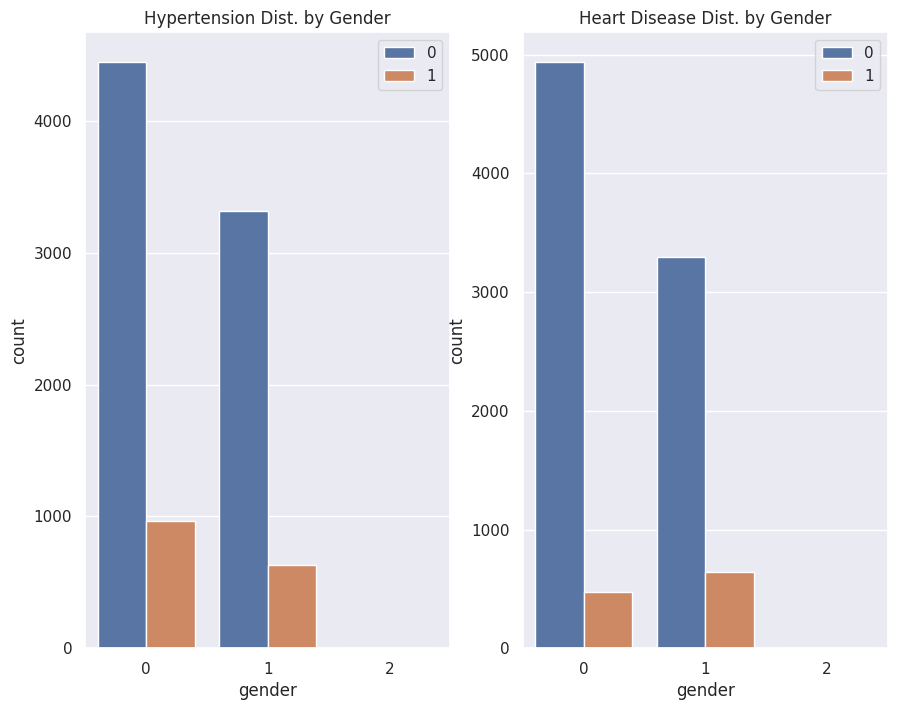

In [179]:
# Count Plot
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.title("Hypertension Dist. by Gender")
sns.countplot(x=df["gender"],hue="hypertension",data=df);
plt.legend(loc=1,prop={"size":11})

plt.subplot(1,3,2)
plt.title("Heart Disease Dist. by Gender")
sns.countplot(x=df["gender"],hue="heart_disease",data=df);
plt.legend(loc=1,prop={"size":11})

plt.show();

**INTERPRETATIONS:**

Based on the information presented in these graphs, it appears that a relatively low number of individuals in this dataset have hypertension or heart disease. However, it's important to note that this may not be representative of the population as a whole, and further analysis is needed to fully understand the prevalence of these conditions in the general population. Additionally, it's important to consider other factors such as age, gender, and lifestyle when assessing the risk of developing hypertension or heart disease.

<Axes: >

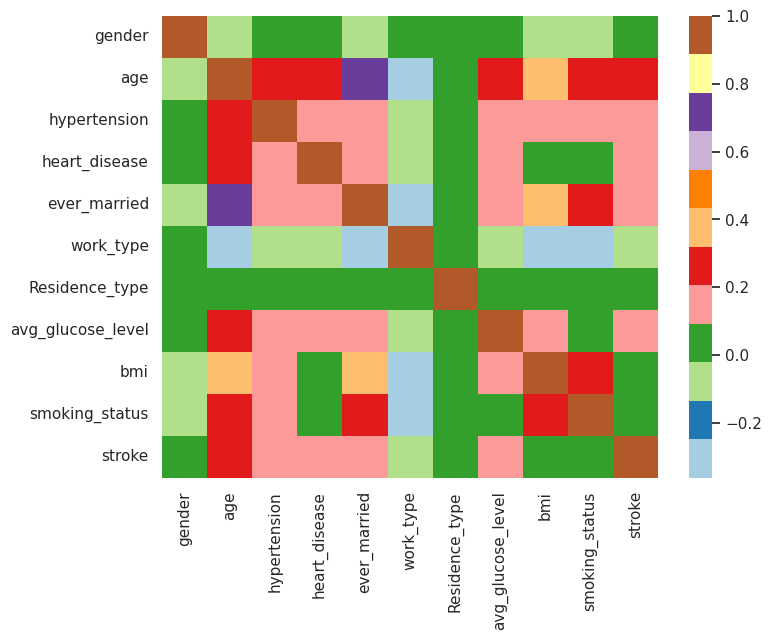

In [48]:
# Heatmap which consists correlation of all attributes
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(df.corr(),cmap= 'Paired')

**INTERPRETATIONS:**

Based on the heatmap, it appears that age has the strongest correlation with stroke risk, followed by hypertension, average glucose level, heart disease, and BMI. This suggests that older age and hypertension are the most important risk factors to consider when assessing an individual's risk of stroke. Additionally, it's important to consider other factors such as lifestyle, medical history, and family history when evaluating an individual's overall risk of stroke.

# Model Exploration and Model Selection

In [49]:
from sklearn.utils import resample,shuffle
#set the minority class to a seperate dataframe
df_1 = df[df['stroke'] == 1]
#set other classes to another dataframe
other_df = df[df['stroke'] == 0]
#upsample the minority class
df_1_upsampled = resample(df_1,random_state=42,n_samples=4500,replace=True)
#concatenate the upsampled dataframe
df_upsampled = pd.concat([df_1_upsampled,other_df])
df = df_upsampled

In [50]:
# Initializing the independent as well as dependent variables and displaying them
X=df.iloc[:,df.columns !='stroke']
Y=df.iloc[:,df.columns =="stroke"]

In [51]:
X.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [52]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
102,0,74,0,0,1,2,0,231.61,34.6,1
179,1,81,0,0,1,2,1,213.22,26.1,0
92,0,57,0,0,0,3,1,68.02,37.5,2
14,0,79,0,1,1,2,1,214.09,28.2,2
106,0,50,1,0,1,2,0,73.18,30.3,1


In [53]:
Y.columns

Index(['stroke'], dtype='object')

In [54]:
Y.head()

,stroke
102,1
179,1
92,1
14,1
106,1


In [55]:
# Splitting dataset into train and test data and checking shape
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=42)

In [56]:
X_train.shape

(7488, 10)

In [57]:
X_test.shape

(1873, 10)

In [58]:
y_train.shape

(7488, 1)

In [59]:
y_test.shape

(1873, 1)

**Random Forest Classification**

In [60]:
# Implementing Random Forest Classification Algorithm
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=15)
random_forest.fit(X_train,y_train.values.ravel())
y_pred = random_forest.predict(X_test)

**Logistic Regression**

In [61]:
# Implementing Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()
model2.fit(X_train,y_train.values.ravel())
xpredict=model2.predict(X_test)

**Support Vector Machine Classifier**

In [62]:
# Implementing Support Vector Machine Classifier Algorithm
from sklearn import svm
model3=svm.SVC()
model3.fit(X_train,y_train.values.ravel())
xpredict=model3.predict(X_test)

**Naive Bayes Classifier**

In [63]:
# Implementing Gaussian Naive Bayes Classifier Algorithm
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

**Decision Tree Classifier**

In [64]:
# Implementing Decision Tree Classifier Algorithm
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "log_loss", random_state = 42, max_depth=9, min_samples_leaf=12)
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)

**K-Nearest Neighbors Classifier**

In [65]:
# Implementing K-Nearest Neighbors Classifier Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

**Multi-Layer Perceptron Classifier (Artificial Neural Network)**

In [66]:
# Implementing Multi-Layer Perceptron Classifier Algorithm (Artificial Neural Network)
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import KernelPCA
from imblearn.pipeline import make_pipeline
clf = MLPClassifier(solver='lbfgs', learning_rate='constant', activation='tanh')
kernel = KernelPCA()
pipeline = make_pipeline(kernel, clf)
pipeline.fit(X_train, y_train)
xpredict4=pipeline.predict(X_test)

**Linear Discriminant Analysis Algorithm**

In [67]:
# Implementing Linear Discriminant Analysis Algorithms
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize LDA classifier
lda = LinearDiscriminantAnalysis()

# Fit the model to the training data
lda.fit(X_train, y_train)

# Predict the classes of the test data
y_pred = lda.predict(X_test)

# Performance Evaluation and Interpretation

In [68]:
from google.colab import files
df_file = files.upload()

Saving Stroke_Prediction_Processed_Data2.csv to Stroke_Prediction_Processed_Data2 (1).csv


In [69]:
# Storing values of CSV file into a dataframe
df = pd.read_csv('Stroke_Prediction_Processed_Data2.csv')

In [70]:
# drop column 'Unnamed: 0'
df = df.drop('Unnamed: 0', axis=1)

In [71]:
# Displaying first five records
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,74,0,0,1,2,0,231.61,34.6,1,1
1,1,81,0,0,1,2,1,213.22,26.1,0,1
2,0,57,0,0,0,3,1,68.02,37.5,2,1
3,0,79,0,1,1,2,1,214.09,28.2,2,1
4,0,50,1,0,1,2,0,73.18,30.3,1,1


In [72]:
# Displaying last five records
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9356,0,80,1,0,1,2,1,83.75,28.89,2,0
9357,0,81,0,0,1,3,1,125.20,40.00,2,0
9358,0,35,0,0,1,3,0,82.99,30.60,2,0
9359,1,51,0,0,1,2,0,166.29,25.60,1,0
9360,0,44,0,0,1,0,1,85.28,26.20,0,0


In [73]:
# Checking the shape of the dataframe
print(df.shape)

(9361, 11)


In [74]:
# Initializing the independent as well as dependent variables and displaying them
X=df.iloc[:,df.columns !='stroke']
Y=df.iloc[:,df.columns =="stroke"]

In [75]:
X.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [76]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,74,0,0,1,2,0,231.61,34.6,1
1,1,81,0,0,1,2,1,213.22,26.1,0
2,0,57,0,0,0,3,1,68.02,37.5,2
3,0,79,0,1,1,2,1,214.09,28.2,2
4,0,50,1,0,1,2,0,73.18,30.3,1


In [77]:
Y.columns

Index(['stroke'], dtype='object')

In [78]:
Y.head()

,stroke
0,1
1,1
2,1
3,1
4,1


In [79]:
# Splitting dataset into train and test data and checking shape
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=42)

In [80]:
X_train.shape

(7488, 10)

In [81]:
X_test.shape

(1873, 10)

In [82]:
y_train.shape

(7488, 1)

In [83]:
y_test.shape

(1873, 1)

**Random Forest Classification**

In [84]:
# Implementing Random Forest Classification Algorithm
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=15)
random_forest.fit(X_train,y_train.values.ravel())
y_pred = random_forest.predict(X_test)

In [85]:
# Confusion Matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, precision_score, recall_score, f1_score
from sklearn import metrics
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[972,  19],
       [  0, 882]])

In [86]:
# Accuracy Score
rfacc = accuracy_score(y_test,y_pred)
rfacc = np.round(rfacc*100,2)
rfacc

98.99

In [87]:
# Precision Score
rfprec = metrics.precision_score(y_test,y_pred)
rfprec = np.round(rfprec*100,2)
rfprec

97.89

In [88]:
# Recall Score
rfrec = metrics.recall_score(y_test,y_pred)
rfrec = np.round(rfrec*100,2)
rfrec

100.0

In [89]:
# F1 Score
rff1 = metrics.f1_score(y_test,y_pred)
rff1 = np.round(rff1*100,2)
rff1

98.93

In [90]:
# Specificity Score
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
rfspec = np.round((tn / (tn+fp))*100, 2)
rfspec

98.08

In [91]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_test is the true labels, y_pred is the predicted scores
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred)
roc_auc_rf = auc(fpr1, tpr1)
roc_auc_rf

0.9904137235116045

**Logistic Regression**

In [92]:
# Implementing Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()
model2.fit(X_train,y_train.values.ravel())
xpredict=model2.predict(X_test)

In [93]:
# Confusion Matrix
cnf_matrix = confusion_matrix(y_test,xpredict)
cnf_matrix

array([[739, 252],
       [228, 654]])

In [94]:
# Accuracy Score
lracc=metrics.accuracy_score(y_test,xpredict)
lracc = np.round(lracc*100,2)
lracc

74.37

In [95]:
# Precision Score
lrprec = metrics.precision_score(y_test,xpredict)
lrprec = np.round(lrprec*100,2)
lrprec

72.19

In [96]:
# Recall Score
lrrec = metrics.recall_score(y_test,xpredict)
lrrec = np.round(lrrec*100,2)
lrrec

74.15

In [97]:
# F1 Score
lrf1 = metrics.f1_score(y_test,xpredict)
lrf1 = np.round(lrf1*100,2)
lrf1

73.15

In [98]:
# Specificity Score
tn, fp, fn, tp = confusion_matrix(y_test, xpredict).ravel()
lrspec = np.round((tn / (tn+fp))*100, 2)
lrspec

74.57

In [99]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_test is the true labels, x_predict is the predicted scores
fpr2, tpr2, thresholds2 = roc_curve(y_test, xpredict)
roc_auc_lr = auc(fpr2, tpr2)
roc_auc_lr

0.7436040006315342

**Support Vector Machine Classifier**

In [100]:
# Implementing Support Vector Machine Classifier Algorithm
from sklearn import svm
model3=svm.SVC()
model3.fit(X_train,y_train.values.ravel())
xpredict=model3.predict(X_test)

In [101]:
# Confusion Matrix
cnf_matrix = confusion_matrix(y_test,xpredict)
cnf_matrix

array([[711, 280],
       [210, 672]])

In [102]:
# Accuracy Score
svmacc=metrics.accuracy_score(y_test,xpredict)
svmacc = np.round(svmacc*100,2)
svmacc

73.84

In [103]:
# Precision Score
svmprec = metrics.precision_score(y_test,xpredict)
svmprec = np.round(svmprec*100,2)
svmprec

70.59

In [104]:
# Recall Score
svmrec = metrics.recall_score(y_test,xpredict)
svmrec = np.round(svmrec*100,2)
svmrec

76.19

In [105]:
# F1 Score
svmf1 = metrics.f1_score(y_test,xpredict)
svmf1 = np.round(svmf1*100,2)
svmf1

73.28

In [106]:
# Specificity Score
tn, fp, fn, tp = confusion_matrix(y_test, xpredict).ravel()
svmspec = np.round((tn / (tn+fp))*100, 2)
svmspec

71.75

In [107]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_test is the true labels, x_predict is the predicted scores
fpr3, tpr3, thresholds3 = roc_curve(y_test, xpredict)
roc_auc_svm = auc(fpr3, tpr3)
roc_auc_svm

0.7396809379654989

**Naive Bayes Classifier**

In [108]:
# Implementing Gaussian Naive Bayes Classifier Algorithm
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [109]:
# Confusion Matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[735, 256],
       [210, 672]])

In [110]:
# Accuracy Score
gnbacc = metrics.accuracy_score(y_test,y_pred)
gnbacc = np.round(gnbacc*100,2)
gnbacc

75.12

In [111]:
# Precision Score
gnbprec = metrics.precision_score(y_test,y_pred)
gnbprec = np.round(gnbprec*100,2)
gnbprec

72.41

In [112]:
# Recall Score
gnbrec = metrics.recall_score(y_test,y_pred)
gnbrec = np.round(gnbrec*100,2)
gnbrec

76.19

In [113]:
# F1 Score
gnbf1 = metrics.f1_score(y_test,y_pred)
gnbf1 = np.round(gnbf1*100,2)
gnbf1

74.25

In [114]:
# Specificity Score
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
gnbspec = np.round((tn / (tn+fp))*100, 2)
gnbspec

74.17

In [115]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_test is the true labels, y_pred is the predicted scores
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred)
roc_auc_gnb = auc(fpr4, tpr4)
roc_auc_gnb

0.751789918792946

**Decision Tree Classifier**

In [116]:
# Implementing Decision Tree Classifier Algorithm
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "log_loss", random_state = 42, max_depth=9, min_samples_leaf=12)
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)

In [117]:
# Confusion Matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[808, 183],
       [ 99, 783]])

In [118]:
# Accuracy Score
dtacc = metrics.accuracy_score(y_test,y_pred)
dtacc = np.round(dtacc*100,2)
dtacc

84.94

In [119]:
# Precision Score
dtprec = metrics.precision_score(y_test,y_pred)
dtprec = np.round(dtprec*100,2)
dtprec

81.06

In [120]:
# Recall Score
dtrec = metrics.recall_score(y_test,y_pred)
dtrec = np.round(dtrec*100,2)
dtrec

88.78

In [121]:
# F1 Score
dtf1 = metrics.f1_score(y_test,y_pred)
dtf1 = np.round(dtf1*100,2)
dtf1

84.74

In [122]:
# Specificity Score
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
dtspec = np.round((tn / (tn+fp))*100, 2)
dtspec

81.53

In [123]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_test is the true labels, y_pred is the predicted scores
fpr5, tpr5, thresholds5 = roc_curve(y_test, y_pred)
roc_auc_dt = auc(fpr5, tpr5)
roc_auc_dt

0.8515465722111246

**K-Nearest Neighbors Classifier**

In [124]:
# Implementing K-Nearest Neighbors Classifier Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [125]:
# Confusion Matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[703, 288],
       [  0, 882]])

In [126]:
# Accuracy Score
knnacc = metrics.accuracy_score(y_test,y_pred)
knnacc = np.round(knnacc*100,2)
knnacc

84.62

In [127]:
# Precision Score
knnprec = metrics.precision_score(y_test,y_pred)
knnprec = np.round(knnprec*100,2)
knnprec

75.38

In [128]:
# Recall Score
knnrec = metrics.recall_score(y_test,y_pred)
knnrec = np.round(knnrec*100,2)
knnrec

100.0

In [129]:
# F1 Score
knnf1 = metrics.f1_score(y_test,y_pred)
knnf1 = np.round(knnf1*100,2)
knnf1

85.96

In [130]:
# Specificity Score
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
knnspec = np.round((tn / (tn+fp))*100, 2)
knnspec

70.94

In [131]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_test is the true labels, y_pred is the predicted scores
fpr6, tpr6, thresholds6 = roc_curve(y_test, y_pred)
roc_auc_knn = auc(fpr6, tpr6)
roc_auc_dt

0.8515465722111246

**Multi-Layer Perceptron Classifier (Artificial Neural Network)**

In [132]:
# Implementing Multi-Layer Perceptron Classifier Algorithm (Artificial Neural Network)
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import KernelPCA
from imblearn.pipeline import make_pipeline
clf = MLPClassifier(solver='lbfgs', learning_rate='constant', activation='tanh')
kernel = KernelPCA()
pipeline = make_pipeline(kernel, clf)
pipeline.fit(X_train, y_train)
xpredict4=pipeline.predict(X_test)

In [133]:
# Confusion Matrix
cnf_matrix = confusion_matrix(y_test,xpredict4)
cnf_matrix

array([[788, 203],
       [ 98, 784]])

In [134]:
# Accuracy Score
mlpacc = metrics.accuracy_score(y_test,xpredict4)
mlpacc = np.round(mlpacc*100,2)
mlpacc

83.93

In [135]:
# Precision Score
mlpprec = metrics.precision_score(y_test,xpredict4)
mlpprec = np.round(mlpprec*100,2)
mlpprec

79.43

In [136]:
# Recall Score
mlprec = metrics.recall_score(y_test,xpredict4)
mlprec = np.round(mlprec*100,2)
mlprec

88.89

In [137]:
# F1 Score
mlpf1 = metrics.f1_score(y_test,xpredict4)
mlpf1 = np.round(mlpf1*100,2)
mlpf1

83.9

In [138]:
# Specificity Score
tn, fp, fn, tp = confusion_matrix(y_test, xpredict4).ravel()
mlpspec = np.round((tn / (tn+fp))*100, 2)
mlpspec

79.52

In [139]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_test is the true labels, xpredict4 is the predicted scores
fpr7, tpr7, thresholds7 = roc_curve(y_test, xpredict4)
roc_auc_mlp = auc(fpr7, tpr7)
roc_auc_mlp

0.842022648278955

**Linear Discriminant Analysis Algorithm**

In [140]:
# Implementing Linear Discriminant Analysis Algorithms
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize LDA classifier
lda = LinearDiscriminantAnalysis()

# Fit the model to the training data
lda.fit(X_train, y_train)

# Predict the classes of the test data
y_pred = lda.predict(X_test)

In [141]:
# Confusion Matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, precision_score, recall_score, f1_score
from sklearn import metrics
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[725, 266],
       [218, 664]])

In [142]:
# Accuracy Score
ldaacc = accuracy_score(y_test,y_pred)
ldaacc = np.round(ldaacc*100,2)
ldaacc

74.16

In [143]:
# Precision Score
ldaprec = metrics.precision_score(y_test,y_pred)
ldaprec = np.round(ldaprec*100,2)
ldaprec

71.4

In [144]:
# Recall Score
ldarec = metrics.recall_score(y_test,y_pred)
ldarec = np.round(ldarec*100,2)
ldarec

75.28

In [145]:
# F1 Score
ldaf1 = metrics.f1_score(y_test,y_pred)
ldaf1 = np.round(ldaf1*100,2)
ldaf1

73.29

In [146]:
# Specificity Score
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
ldaspec = np.round((tn / (tn+fp))*100, 2)
ldaspec

73.16

In [147]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_test is the true labels, y_pred is the predicted scores
fpr8, tpr8, thresholds8 = roc_curve(y_test, y_pred)
roc_auc_lda = auc(fpr8, tpr8)
roc_auc_lda

0.7422093627225529

**Comparison of Metrics**

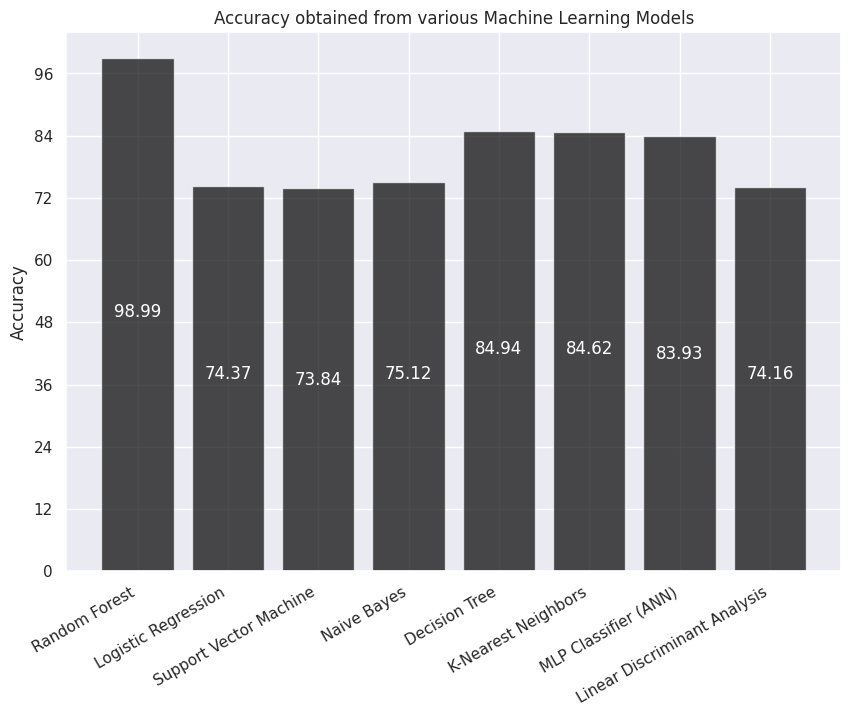

In [148]:
# Comparing Accuracy obtained from various Machine Learning Models
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 7]
objects = ('Random Forest',' Logistic Regression','Support Vector Machine','Naive Bayes','Decision Tree','K-Nearest Neighbors','MLP Classifier (ANN)','Linear Discriminant Analysis')
y_pos = np.arange(len(objects))
performance = [rfacc,lracc,svmacc,gnbacc,dtacc,knnacc,mlpacc,ldaacc]
plt.yticks(np.arange(0, 100, step=12))
plt.bar(y_pos, performance, align='center', alpha=0.7, color = 'black')
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Accuracy obtained from various Machine Learning Models')
for i in range(len(performance)):
  plt.text(i, performance[i]//2, performance[i], ha = 'center', color = 'white')
plt.xticks(rotation=30, ha='right')
plt.show()

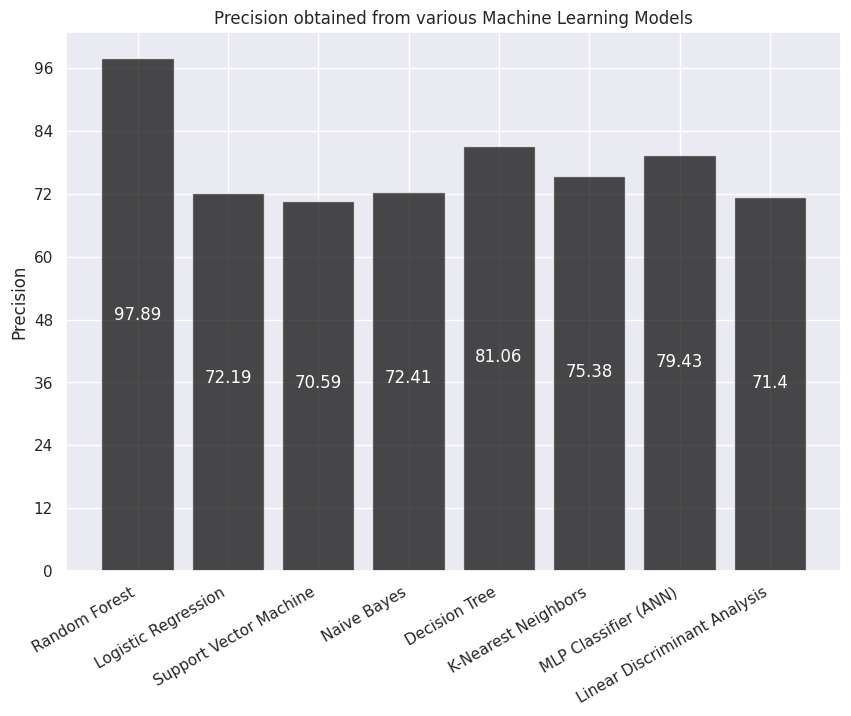

In [149]:
# Comparing Precision obtained from various Machine Learning Models
plt.rcParams['figure.figsize'] = [10, 7]
objects = ('Random Forest',' Logistic Regression','Support Vector Machine','Naive Bayes','Decision Tree','K-Nearest Neighbors','MLP Classifier (ANN)','Linear Discriminant Analysis')
y_pos = np.arange(len(objects))
performance = [rfprec,lrprec,svmprec,gnbprec,dtprec,knnprec,mlpprec,ldaprec]
plt.yticks(np.arange(0, 100, step=12))
plt.bar(y_pos, performance, align='center', alpha=0.7, color = 'black')
plt.xticks(y_pos, objects)
plt.ylabel('Precision')
plt.title('Precision obtained from various Machine Learning Models')
for i in range(len(performance)):
  plt.text(i, performance[i]//2, performance[i], ha = 'center', color = 'white')
plt.xticks(rotation=30, ha='right')
plt.show()

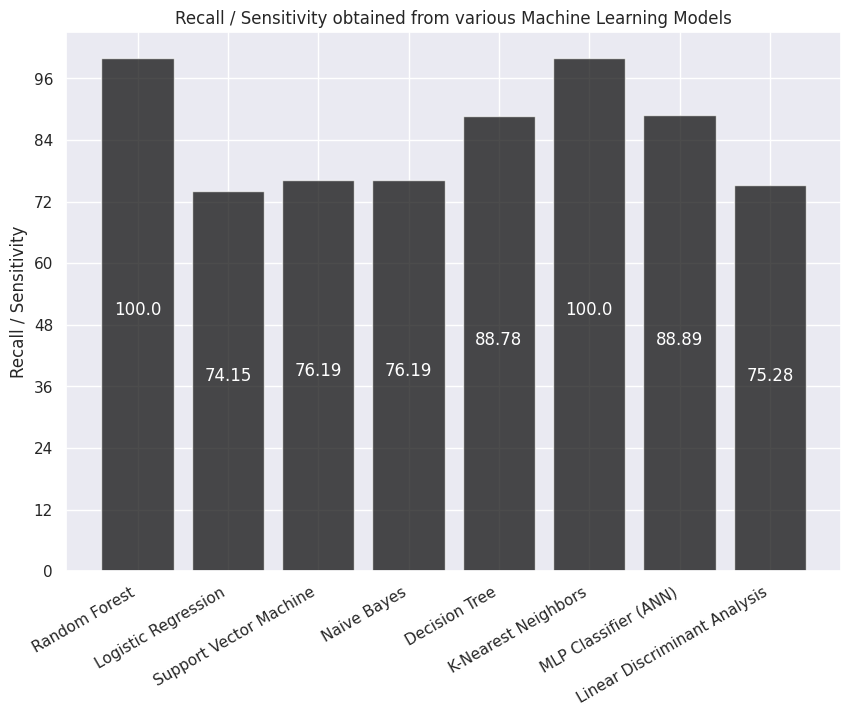

In [150]:
# Comparing Recall/Sensitivity obtained from various Machine Learning Models
plt.rcParams['figure.figsize'] = [10, 7]
objects = ('Random Forest',' Logistic Regression','Support Vector Machine','Naive Bayes','Decision Tree','K-Nearest Neighbors','MLP Classifier (ANN)','Linear Discriminant Analysis')
y_pos = np.arange(len(objects))
performance = [rfrec,lrrec,svmrec,gnbrec,dtrec,knnrec,mlprec,ldarec]
plt.yticks(np.arange(0, 100, step=12))
plt.bar(y_pos, performance, align='center', alpha=0.7, color = 'black')
plt.xticks(y_pos, objects)
plt.ylabel('Recall / Sensitivity')
plt.title('Recall / Sensitivity obtained from various Machine Learning Models')
for i in range(len(performance)):
  plt.text(i, performance[i]//2, performance[i], ha = 'center', color = 'white')
plt.xticks(rotation=30, ha='right')
plt.show()

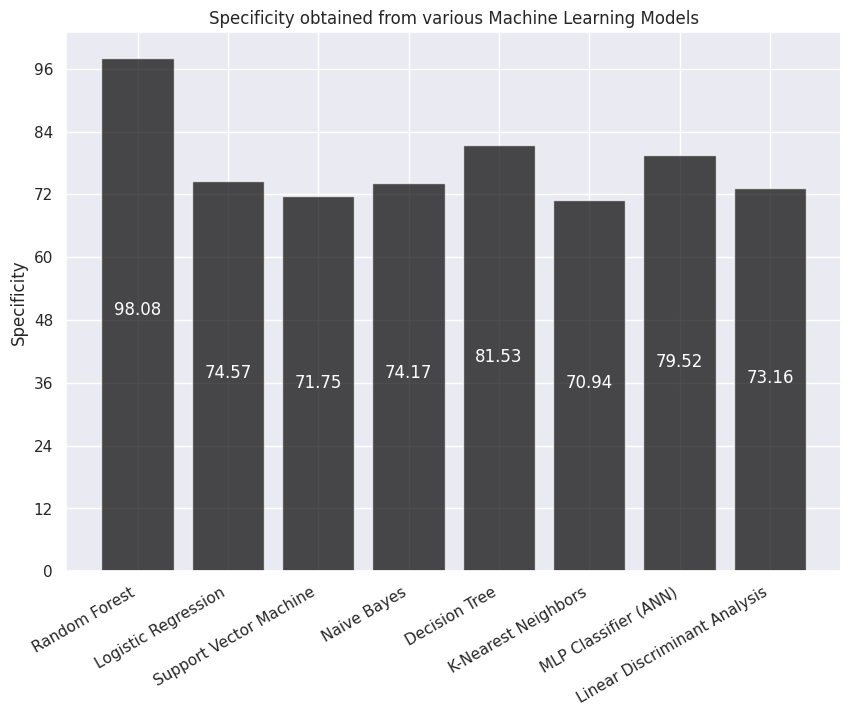

In [151]:
# Comparing Specificity obtained from various Machine Learning Models
plt.rcParams['figure.figsize'] = [10, 7]
objects = ('Random Forest',' Logistic Regression','Support Vector Machine','Naive Bayes','Decision Tree','K-Nearest Neighbors','MLP Classifier (ANN)','Linear Discriminant Analysis')
y_pos = np.arange(len(objects))
performance = [rfspec,lrspec,svmspec,gnbspec,dtspec,knnspec,mlpspec,ldaspec]
plt.yticks(np.arange(0, 100, step=12))
plt.bar(y_pos, performance, align='center', alpha=0.7, color = 'black')
plt.xticks(y_pos, objects)
plt.ylabel('Specificity')
plt.title('Specificity obtained from various Machine Learning Models')
for i in range(len(performance)):
  plt.text(i, performance[i]//2, performance[i], ha = 'center', color = 'white')
plt.xticks(rotation=30, ha='right')
plt.show()

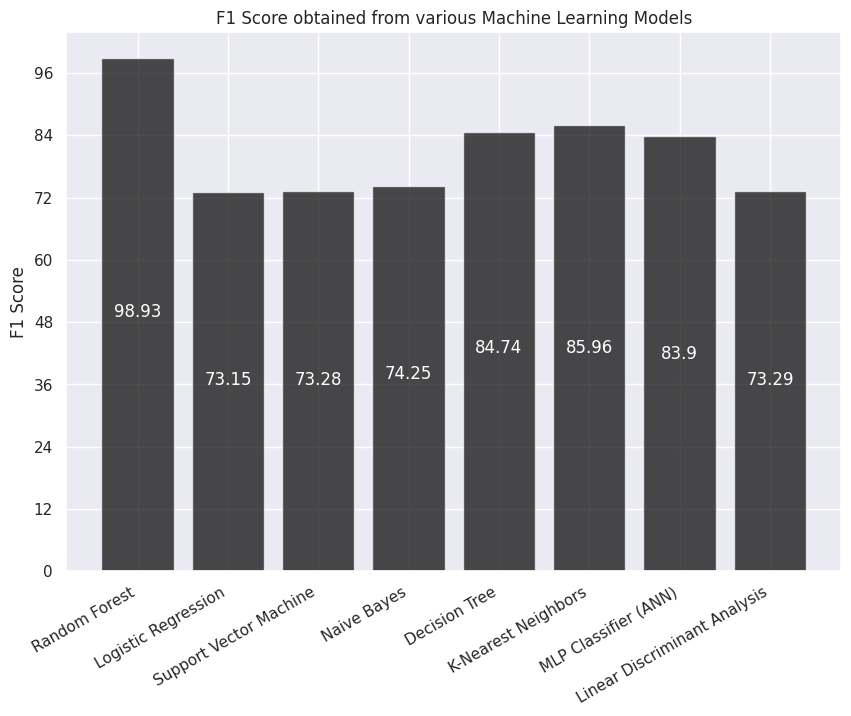

In [152]:
# Comparing F1 Score obtained from various Machine Learning Models
plt.rcParams['figure.figsize'] = [10, 7]
objects = ('Random Forest',' Logistic Regression','Support Vector Machine','Naive Bayes','Decision Tree','K-Nearest Neighbors','MLP Classifier (ANN)','Linear Discriminant Analysis')
y_pos = np.arange(len(objects))
performance = [rff1,lrf1,svmf1,gnbf1,dtf1,knnf1,mlpf1,ldaf1]
plt.yticks(np.arange(0, 100, step=12))
plt.bar(y_pos, performance, align='center', alpha=0.7, color = 'black')
plt.xticks(y_pos, objects)
plt.ylabel('F1 Score')
plt.title('F1 Score obtained from various Machine Learning Models')
for i in range(len(performance)):
  plt.text(i, performance[i]//2, performance[i], ha = 'center', color = 'white')
plt.xticks(rotation=30, ha='right')
plt.show()

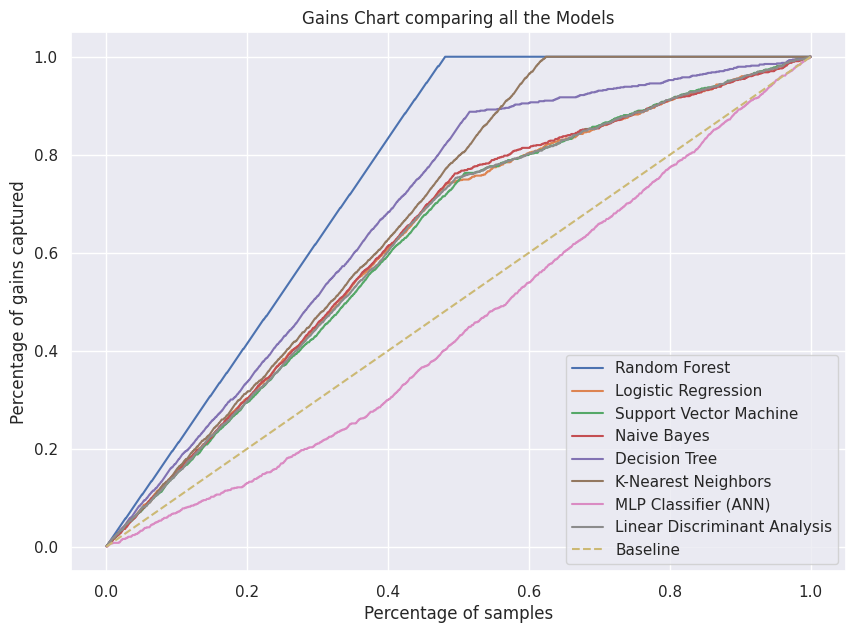

<Figure size 2000x1500 with 0 Axes>

In [153]:
## Gains Chart displaying all the Models

# Calculate predicted and actual values for each model
y_pred_rf = random_forest.predict(X_test)
y_pred_lr = model2.predict(X_test)
y_pred_svm = model3.predict(X_test)
y_pred_gnb = gnb.predict(X_test)
y_pred_dt = clf_gini.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_mlp = clf.predict(X_test)
y_pred_lda = lda.predict(X_test)

# Sort the predictions for each model
sort_indices_model1 = np.argsort(y_pred_rf)[::-1]
sort_indices_model2 = np.argsort(y_pred_lr)[::-1]
sort_indices_model3 = np.argsort(y_pred_svm)[::-1]
sort_indices_model4 = np.argsort(y_pred_gnb)[::-1]
sort_indices_model5 = np.argsort(y_pred_dt)[::-1]
sort_indices_model6 = np.argsort(y_pred_knn)[::-1]
sort_indices_model7 = np.argsort(y_pred_mlp)[::-1]
sort_indices_model8 = np.argsort(y_pred_lda)[::-1]

# Calculate cumulative gains for each model
cum_gains_model1 = np.cumsum(y_test.iloc[sort_indices_model1])
cum_gains_model2 = np.cumsum(y_test.iloc[sort_indices_model2])
cum_gains_model3 = np.cumsum(y_test.iloc[sort_indices_model3])
cum_gains_model4 = np.cumsum(y_test.iloc[sort_indices_model4])
cum_gains_model5 = np.cumsum(y_test.iloc[sort_indices_model5])
cum_gains_model6 = np.cumsum(y_test.iloc[sort_indices_model6])
cum_gains_model7 = np.cumsum(y_test.iloc[sort_indices_model7])
cum_gains_model8 = np.cumsum(y_test.iloc[sort_indices_model8])

# Calculate cumulative gains as a percentage of total possible gains
total_gains = np.sum(y_test)
cum_gains_perc_model1 = cum_gains_model1 / total_gains
cum_gains_perc_model2 = cum_gains_model2 / total_gains
cum_gains_perc_model3 = cum_gains_model3 / total_gains
cum_gains_perc_model4 = cum_gains_model4 / total_gains
cum_gains_perc_model5 = cum_gains_model5 / total_gains
cum_gains_perc_model6 = cum_gains_model6 / total_gains
cum_gains_perc_model7 = cum_gains_model7 / total_gains
cum_gains_perc_model8 = cum_gains_model8 / total_gains

# Plot the gains chart
plt.plot(np.arange(1, len(y_pred_rf) + 1) / len(y_pred_rf), cum_gains_perc_model1, label = 'Random Forest')
plt.plot(np.arange(1, len(y_pred_lr) + 1) / len(y_pred_lr), cum_gains_perc_model2, label = 'Logistic Regression')
plt.plot(np.arange(1, len(y_pred_svm) + 1) / len(y_pred_svm), cum_gains_perc_model3, label = 'Support Vector Machine')
plt.plot(np.arange(1, len(y_pred_gnb) + 1) / len(y_pred_gnb), cum_gains_perc_model4, label = 'Naive Bayes')
plt.plot(np.arange(1, len(y_pred_dt) + 1) / len(y_pred_dt), cum_gains_perc_model5, label = 'Decision Tree')
plt.plot(np.arange(1, len(y_pred_knn) + 1) / len(y_pred_knn), cum_gains_perc_model6, label = 'K-Nearest Neighbors')
plt.plot(np.arange(1, len(y_pred_mlp) + 1) / len(y_pred_mlp), cum_gains_perc_model7, label = 'MLP Classifier (ANN)')
plt.plot(np.arange(1, len(y_pred_lda) + 1) / len(y_pred_lda), cum_gains_perc_model8, label = 'Linear Discriminant Analysis')

plt.plot([0,1],[0,1], linestyle = '--', label = 'Baseline')
plt.xlabel('Percentage of samples')
plt.ylabel('Percentage of gains captured')
plt.title('Gains Chart comparing all the Models')
plt.legend()
plt.figure(figsize=(20,15))
plt.show()

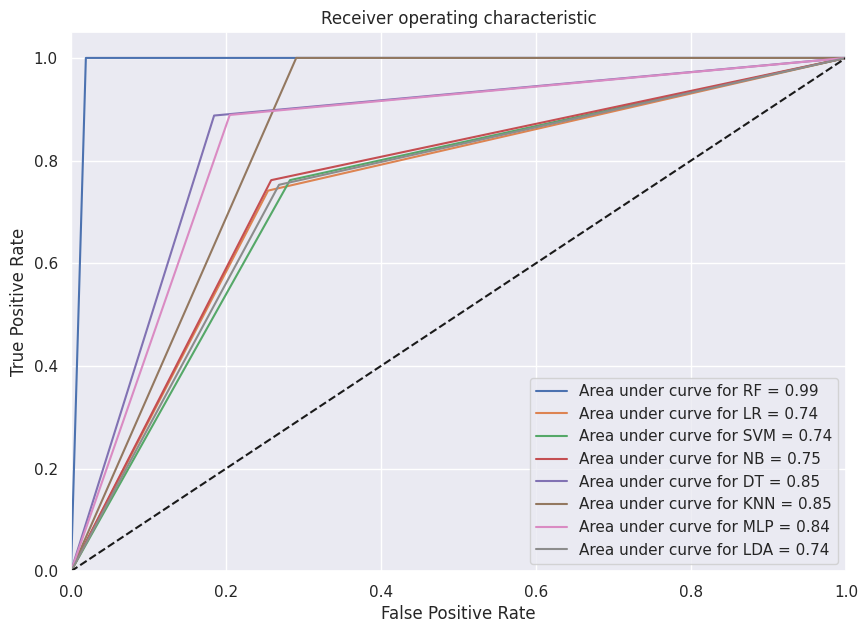

<Figure size 2000x1500 with 0 Axes>

In [154]:
# Plot ROC curve displaying all the models
plt.plot(fpr1, tpr1, label='Area under curve for RF = %0.2f' % roc_auc_rf)
plt.plot(fpr2, tpr2, label='Area under curve for LR = %0.2f' % roc_auc_lr)
plt.plot(fpr3, tpr3, label='Area under curve for SVM = %0.2f' % roc_auc_svm)
plt.plot(fpr4, tpr4, label='Area under curve for NB = %0.2f' % roc_auc_gnb)
plt.plot(fpr5, tpr5, label='Area under curve for DT = %0.2f' % roc_auc_dt)
plt.plot(fpr6, tpr6, label='Area under curve for KNN = %0.2f' % roc_auc_knn)
plt.plot(fpr7, tpr7, label='Area under curve for MLP = %0.2f' % roc_auc_mlp)
plt.plot(fpr8, tpr8, label='Area under curve for LDA = %0.2f' % roc_auc_lda)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.figure(figsize=(20,15))
plt.show()

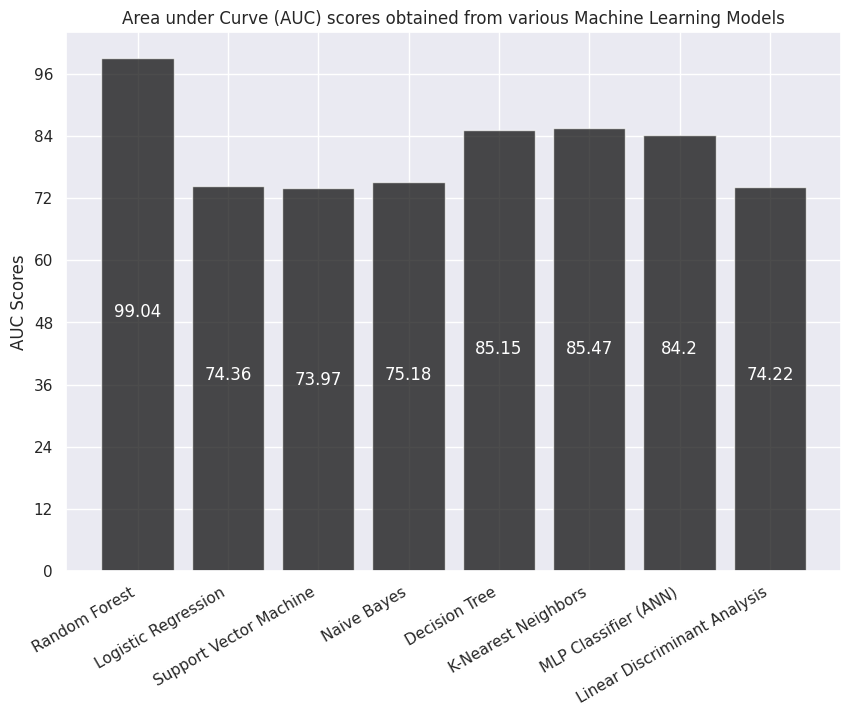

In [155]:
# Comparing Area under Curve (AUC) scores obtained from various Machine Learning Models
plt.rcParams['figure.figsize'] = [10, 7]
objects = ('Random Forest',' Logistic Regression','Support Vector Machine','Naive Bayes','Decision Tree','K-Nearest Neighbors','MLP Classifier (ANN)','Linear Discriminant Analysis')
y_pos = np.arange(len(objects))
performance = [np.round(roc_auc_rf*100,2),np.round(roc_auc_lr*100,2),np.round(roc_auc_svm*100,2),np.round(roc_auc_gnb*100,2),np.round(roc_auc_dt*100,2),np.round(roc_auc_knn*100,2),np.round(roc_auc_mlp*100,2),np.round(roc_auc_lda*100,2)]
plt.yticks(np.arange(0, 100, step=12))
plt.bar(y_pos, performance, align='center', alpha=0.7, color = 'black')
plt.xticks(y_pos, objects)
plt.ylabel('AUC Scores')
plt.title('Area under Curve (AUC) scores obtained from various Machine Learning Models')
for i in range(len(performance)):
  plt.text(i, performance[i]//2, performance[i], ha = 'center', color = 'white')
plt.xticks(rotation=30, ha='right')
plt.show()

**INTERPRETATIONS:**

Highest values of:

**Accuracy:** Random Forest Classification Algorithm

**Precision:** Random Forest Classification Algorithm

**Recall/Sensitivity:** Random Forest Classification Algorithm as well as K-Nearest Neighbors Algorithm

**Specificity:** Random Forest Classification Algorithm

**F1 Score:** Random Forest Classification Algorithm

**Cumulative Gains Percentages:** Random Forest Classification Algorithm

**Area Under Curve Score:** Random Forest Classification Algorithm

Based on above findings, **Random Forest Classification** algorithm is performing the best with regards to the stroke prediction dataset and has been decided as the final model to perform classification in our project.

**Best Model - Random Forest Classifier Algorithm**

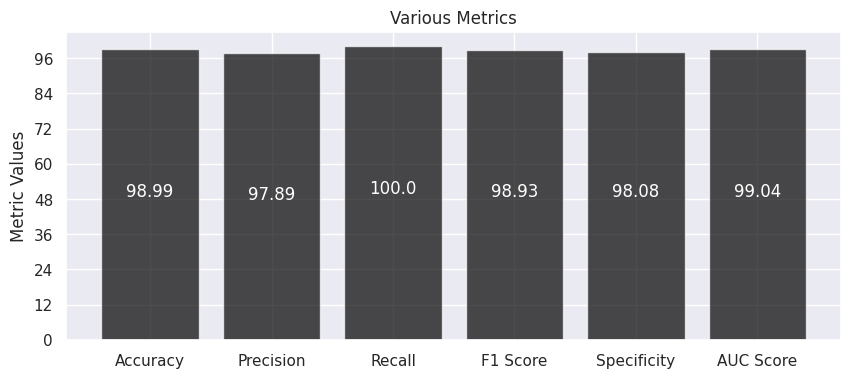

In [157]:
# Plotting the metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 4]
objects = ('Accuracy','Precision','Recall','F1 Score','Specificity','AUC Score')
y_pos = np.arange(len(objects))
performance = [rfacc,rfprec,rfrec,rff1,rfspec,np.round(roc_auc_rf*100,2)]
plt.yticks(np.arange(0, 100, step=12))
plt.bar(y_pos, performance, align='center', alpha=0.7, color = 'black')
plt.xticks(y_pos, objects)
plt.ylabel('Metric Values')
plt.title('Various Metrics')
for i in range(len(performance)):
  plt.text(i, performance[i]//2, performance[i], ha = 'center', color = 'white')
plt.show()

# Implementation of Final Model (Random Forest Classification)

In [158]:
# Implementing Random Forest Classification Algorithm
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=15)
random_forest.fit(X_train,y_train.values.ravel())

RandomForestClassifier(n_estimators=15)

**Positive Test Cases**

In [159]:
# Test Case 1
print(random_forest.predict([[0,68,0,0,1,2,0,211.06,39.3,0]]))

[1]


In [160]:
# Test Case 2
print(random_forest.predict([[0,71,0,0,1,0,0,193.94,22.4,3]]))

[1]


In [161]:
# Test Case 3
print(random_forest.predict([[0,77,1,0,1,3,1,124.13,31.4,2]]))

[1]


In [162]:
# Test Case 4
print(random_forest.predict([[1,82,0,0,1,0,1,200.59,29,1]]))

[1]


In [163]:
# Test Case 5
print(random_forest.predict([[1,80,0,0,1,2,0,259.63,31.7,3]]))

[1]


In [164]:
# Test Case 6
print(random_forest.predict([[1,49,0,0,0,2,0,104.86,31.9,3]]))

[1]


In [165]:
# Test Case 7
print(random_forest.predict([[0,76,0,0,1,3,1,106.41,28.89,1]]))

[1]


**Negative Test Cases**

In [166]:
# Test Case 1
print(random_forest.predict([[1,65,0,0,1,0,0,111.85,26.7,2]]))

[0]


In [167]:
# Test Case 2
print(random_forest.predict([[0,79,0,0,1,2,1,70.35,23,1]]))

[0]


In [168]:
# Test Case 3
print(random_forest.predict([[0,13,0,0,0,4,1,131.51,41.7,2]]))

[0]


In [169]:
# Test Case 4
print(random_forest.predict([[0,61,0,0,1,2,0,123.36,33.4,2]]))

[0]


In [170]:
# Test Case 5
print(random_forest.predict([[1,41,1,0,1,2,1,69.52,31.9,2]]))

[0]


In [171]:
# Test Case 6
print(random_forest.predict([[0,80,1,1,1,2,0,115.52,34.4,0]]))

[0]


In [172]:
# Test Case 7
print(random_forest.predict([[0,65,0,0,1,3,0,167.31,27.1,2]]))

[0]


# Conclusion

**Why Random Forest Classifier Algorithm performs the best as compared to the other models used in our project?**

Random Forest is a form of ensemble learning method that makes predictions by combining numerous decision trees. It has been found to be quite effective in a wide range of real-world applications, and there are various reasons why it frequently outperforms other models.

Some of the reasons are:


*   Handles non-linear relationships well
*   Handles missing values well
*   Ensemble Learning  
*   Robust to outliers
*   Feature Importance





**Potential Drawbacks / Disadvantages of Random Forest Classifier Algorithm:**



*   Results in overfitting of training data
*   Lack of transparency as it is a black box model
*   Biased towards categorical variables
*   Sensitive to noisy data



**Solutions to the drawbacks of Random Forest Classifier Algorithm:**



*   Using regularization techniques such as pruning, which prevents the trees from growing too deep.

*   Using cross-validation to tune the hyperparameters of the algorithm, such as the number of trees and the maximum depth of each tree.

*   Using model-agnostic interpretability techniques such as SHAP values or LIME to explain the model's predictions

*   Using robust statistics or resampling techniques, such as bootstrapping or cross-validation, to reduce the impact of noisy data on the model's predictions.





